In [ ]:
from plotnine import *
from plotnine.data import *
import pandas as pd
import numpy as np

# 第一張圖：睡眠時長與REM時長與物種基因關聯性之棒棒糖圖

## 資料集使用

In [ ]:
msleep

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


In [ ]:
msleep.columns

Index(['name', 'genus', 'vore', 'order', 'conservation', 'sleep_total',
       'sleep_rem', 'sleep_cycle', 'awake', 'brainwt', 'bodywt'],
      dtype='object')

In [ ]:
msleep.dtypes

name              object
genus             object
vore            category
order             object
conservation    category
sleep_total      float64
sleep_rem        float64
sleep_cycle      float64
awake            float64
brainwt          float64
bodywt           float64
dtype: object

In [ ]:
msleep.describe(include='all')

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
count,83,83,76,83,54,83.000000,61.000000,32.000000,83.000000,56.000000,83.000000
unique,83,77,4,19,6,NaN,NaN,NaN,NaN,NaN,NaN
top,Cheetah,Panthera,herbi,Rodentia,lc,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3,32,22,27,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,10.433735,1.875410,0.439583,13.567470,0.281581,166.136349
std,NaN,NaN,NaN,NaN,NaN,4.450357,1.298288,0.358680,4.452085,0.976414,786.839732
min,NaN,NaN,NaN,NaN,NaN,1.900000,0.100000,0.116667,4.100000,0.000140,0.005000
25%,NaN,NaN,NaN,NaN,NaN,7.850000,0.900000,0.183333,10.250000,0.002900,0.174000
50%,NaN,NaN,NaN,NaN,NaN,10.100000,1.500000,0.333333,13.900000,0.012400,1.670000
75%,NaN,NaN,NaN,NaN,NaN,13.750000,2.400000,0.579167,16.150000,0.125500,41.750000


## 整理資料

In [ ]:
msleep.order.unique()

array(['Carnivora', 'Primates', 'Rodentia', 'Soricomorpha',
       'Artiodactyla', 'Pilosa', 'Cingulata', 'Hyracoidea',
       'Didelphimorphia', 'Proboscidea', 'Chiroptera', 'Perissodactyla',
       'Erinaceomorpha', 'Cetacea', 'Lagomorpha', 'Diprotodontia',
       'Monotremata', 'Afrosoricida', 'Scandentia'], dtype=object)

In [ ]:
#此索引值應有四種值，不會有空格
msleep.vore.unique()

['carni', 'omni', 'herbi', NaN, 'insecti']
Categories (4, object): ['carni', 'herbi', 'insecti', 'omni']

In [ ]:
#找出此欄空格的動物
msleep.loc[msleep.vore.isnull()]

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
7,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0,NaN,NaN,17.0,NaN,0.045
54,Desert hedgehog,Paraechinus,NaN,Erinaceomorpha,lc,10.3,2.7,NaN,13.7,0.00240,0.550
56,Deer mouse,Peromyscus,NaN,Rodentia,NaN,11.5,NaN,NaN,12.5,NaN,0.021
57,Phalanger,Phalanger,NaN,Diprotodontia,NaN,13.7,1.8,NaN,10.3,0.01140,1.620
62,Rock hyrax,Procavia,NaN,Hyracoidea,lc,5.4,0.5,NaN,18.6,0.02100,3.600
68,Mole rat,Spalax,NaN,Rodentia,NaN,10.6,2.4,NaN,13.4,0.00300,0.122
72,Musk shrew,Suncus,NaN,Soricomorpha,NaN,12.8,2.0,0.183333,11.2,0.00033,0.048


## 將資料填入空格 
* [Vesper mouse](https://eol.org/pages/111285) :herbi
* [Desert hedgehog](https://eol.org/pages/1037263) :carni
* [Deer mouse](https://eol.org/pages/311573) :omni
* [Phalanger](https://eol.org/zh-TW/pages/34772) :insecti
* [Rock hyrax](https://eol.org/zh-TW/pages/326384) :herbi (也會以昆蟲為食，但主要為植物)
* [Mole rat](https://en.wikipedia.org/wiki/Naked_mole-rat) :herbi
* [Musk shrew](https://eol.org/pages/327365) :carni

In [ ]:
#Vesper mouse填入herbi
msleep.iloc[7,2] = 'herbi'

In [ ]:
#Desert hedgehog填入carni
msleep.iloc[54,2] = 'carni'

In [ ]:
#Deer mouse填入omni
msleep.iloc[56,2] = 'omni'

In [ ]:
#Phalanger填入insecti
msleep.iloc[57,2] = 'insecti'

In [ ]:
#Rock hyrax填入insecti
msleep.iloc[62,2] = 'herbi'

In [ ]:
#Mole rat填入herbi
msleep.iloc[68,2] = 'herbi'

In [ ]:
#Musk shrew填入carni
msleep.iloc[72,2] = 'carni'

In [ ]:
msleep.vore.unique()
#vore裡面沒有空白值ㄌ，YA!

['carni', 'omni', 'herbi', 'insecti']
Categories (4, object): ['carni', 'herbi', 'insecti', 'omni']

In [ ]:
msleep.loc[msleep.vore.isnull()]
#再檢查一次

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt


----

In [ ]:
msleep.loc[msleep.brainwt.isnull()]

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.90,NaN,50.000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.60,NaN,1.350
5,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4,2.2,0.766667,9.60,NaN,3.850
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.383333,15.30,NaN,20.490
7,Vesper mouse,Calomys,herbi,Rodentia,NaN,7.0,NaN,NaN,17.00,NaN,0.045
12,Grivet,Cercopithecus,omni,Primates,lc,10.0,0.7,NaN,14.00,NaN,4.750
26,Western american chipmunk,Eutamias,herbi,Rodentia,NaN,14.9,NaN,NaN,9.10,NaN,0.071
29,Giraffe,Giraffa,herbi,Artiodactyla,cd,1.9,0.4,NaN,22.10,NaN,899.995
30,Pilot whale,Globicephalus,carni,Cetacea,cd,2.7,0.1,NaN,21.35,NaN,800.000
34,Mongoose lemur,Lemur,herbi,Primates,vu,9.5,0.9,NaN,14.50,NaN,1.670


## 作圖

導入字體

In [ ]:
import matplotlib.font_manager as fm
kai = fm.FontProperties(fname='C:/Users/Mao-Joker/Documents/Font/kaiu.ttf')
rig = fm.FontProperties(fname='C:/Users/Mao-Joker/Documents/Font/Righteous-Regular.ttf')
noto = fm.FontProperties(fname='C:\\Users\\Mao-Joker\\Documents\\Font\\NotoSansTC-Medium.otf')

C:\Users\Mao-Joker\anaconda3\envs\pandaslesson\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 22 rows containing missing values.


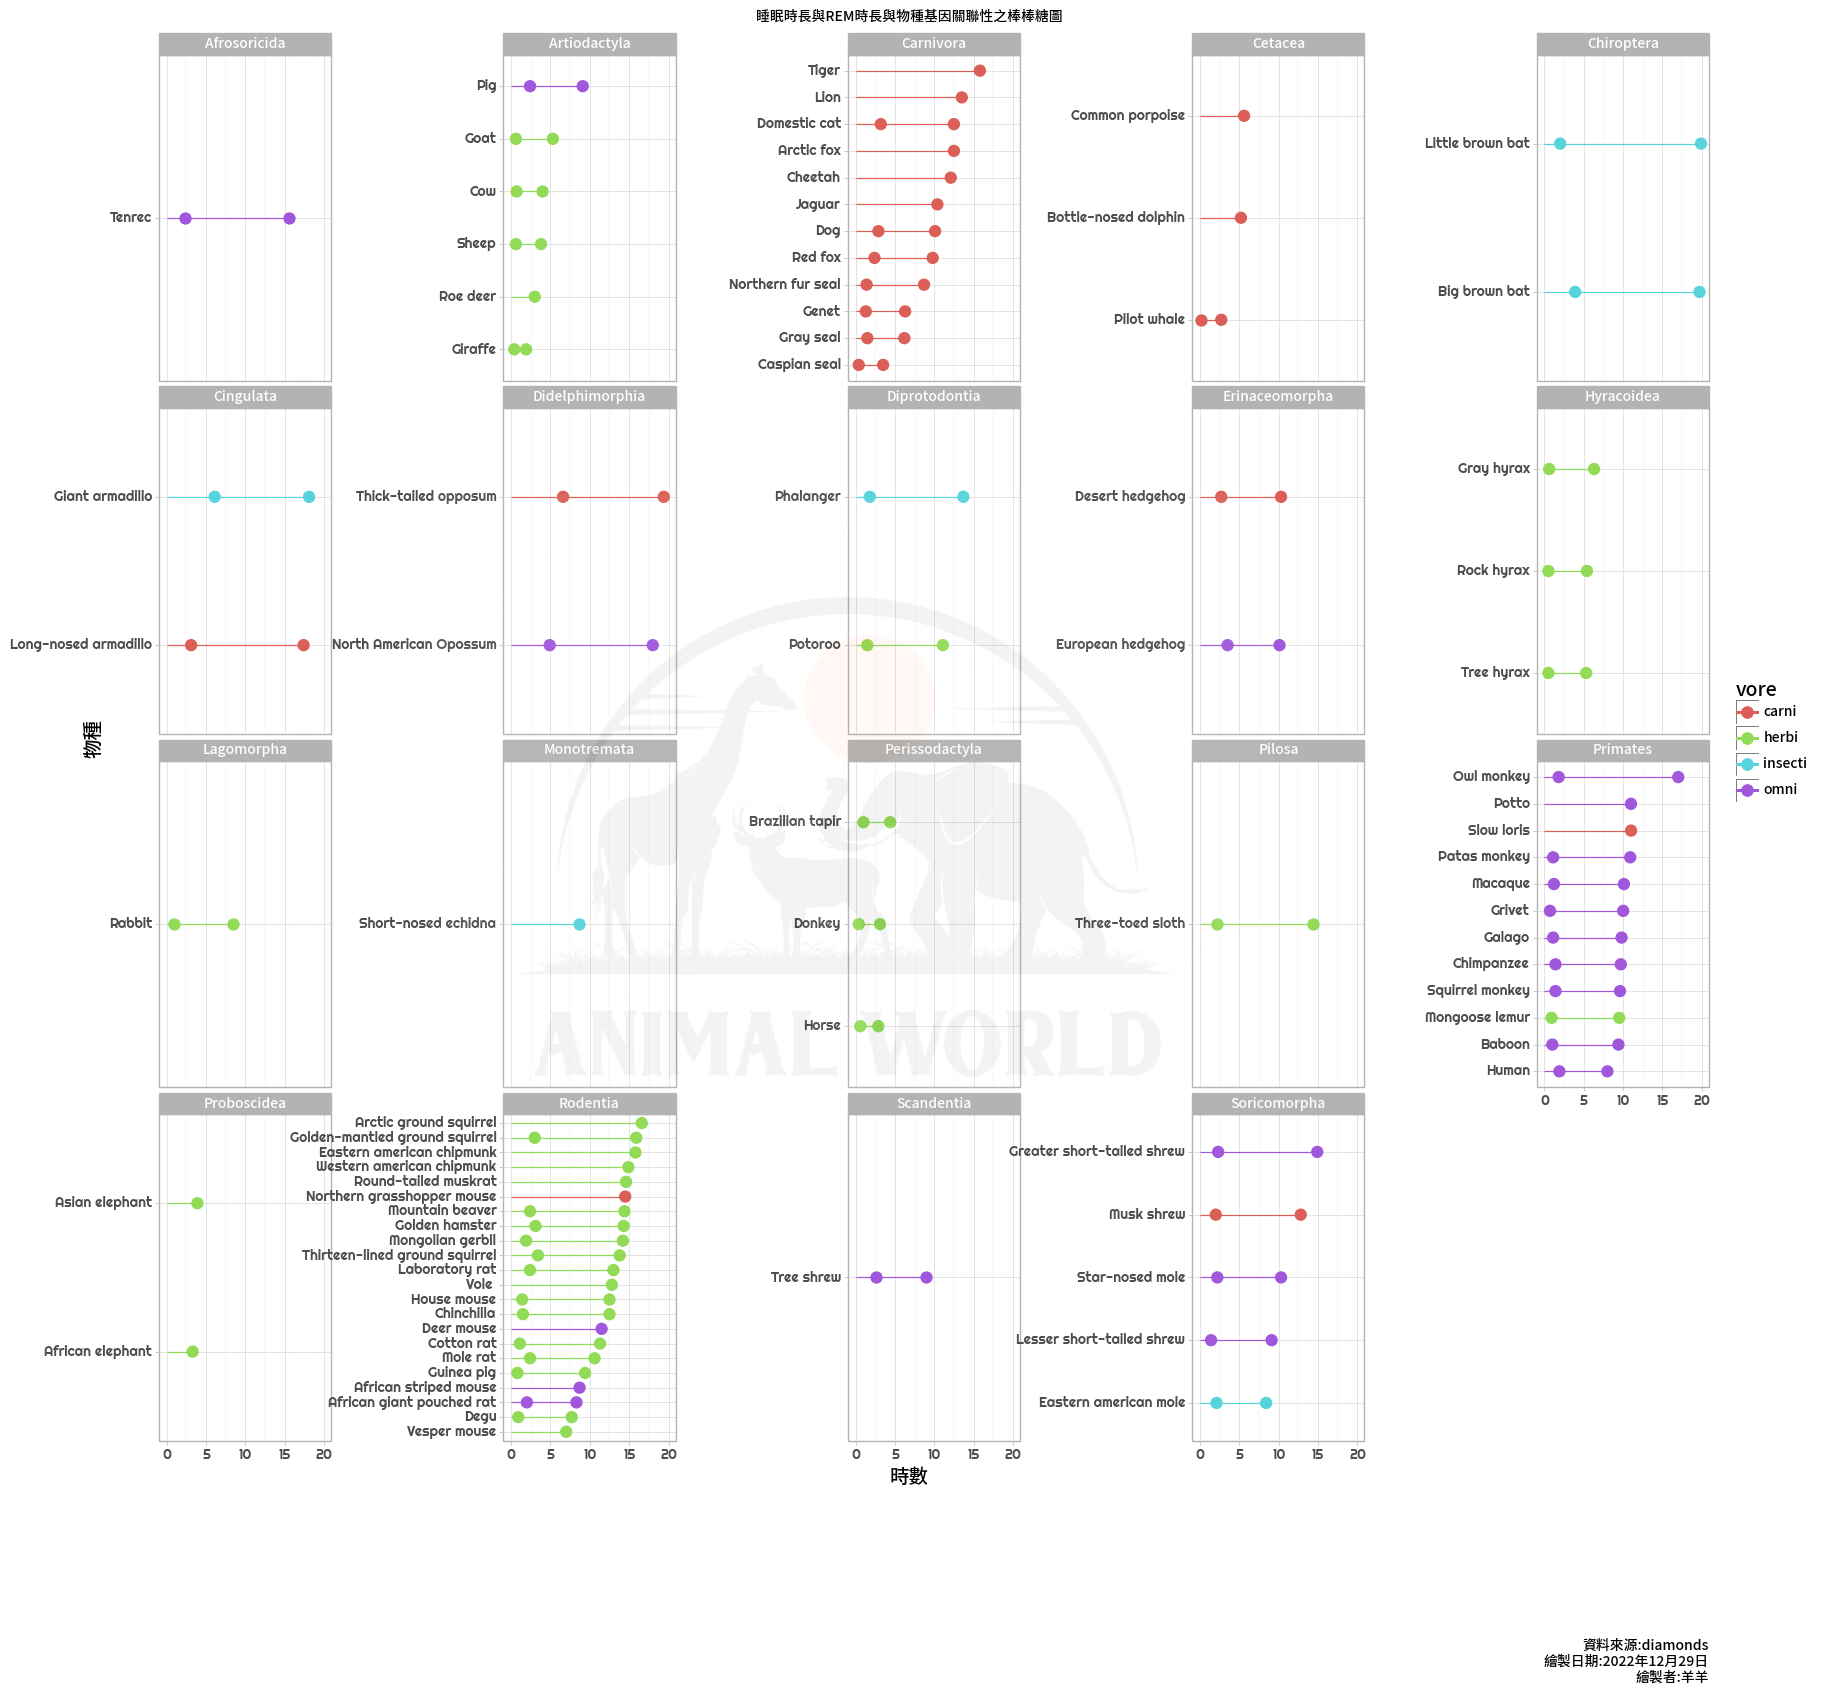

<ggplot: (142790364456)>

In [ ]:
ggplot(msleep, aes(x='sleep_total',y='reorder(name,sleep_total)',color='vore')) +\
  geom_segment(aes(x=0,xend='sleep_total',y='name',yend='name')) +\
  geom_point(shape='o',size=4) +\
  geom_point(aes(x='sleep_rem',y='name'),size=4) +\
  facet_wrap('order',scales='free_y')+\
  labs(title='睡眠時長與REM時長與物種基因關聯性之棒棒糖圖',x='時數',y='物種',
       caption='資料來源:diamonds\n繪製日期:'+pd.Timestamp('today').strftime('%Y年%m月%d日') + '\n繪製者:羊羊') +\
  theme_light()+\
  theme(text=element_text(fontproperties=noto),
        title=element_text(size=14),
        axis_text_y=element_text(fontproperties=rig),
        axis_text_x=element_text(fontproperties=rig),
       plot_caption=element_text(fontproperties=noto),
       figure_size=(20,18),
       subplots_adjust={'wspace': 1}) +\
  watermark('animal_world.PNG', xo=430, yo=600, alpha=0.05)

# 結論
* REM(快速動眼期)時長不與睡眠總時常成正比。
* 途中REM時長有符合現有研究資料顯示，REM睡眠的比例大約占總睡眠的25-30%。
* 大部分物種基因越相近的動物睡眠時長會越像

C:\Users\Mao-Joker\anaconda3\envs\pandaslesson\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 22 rows containing missing values.


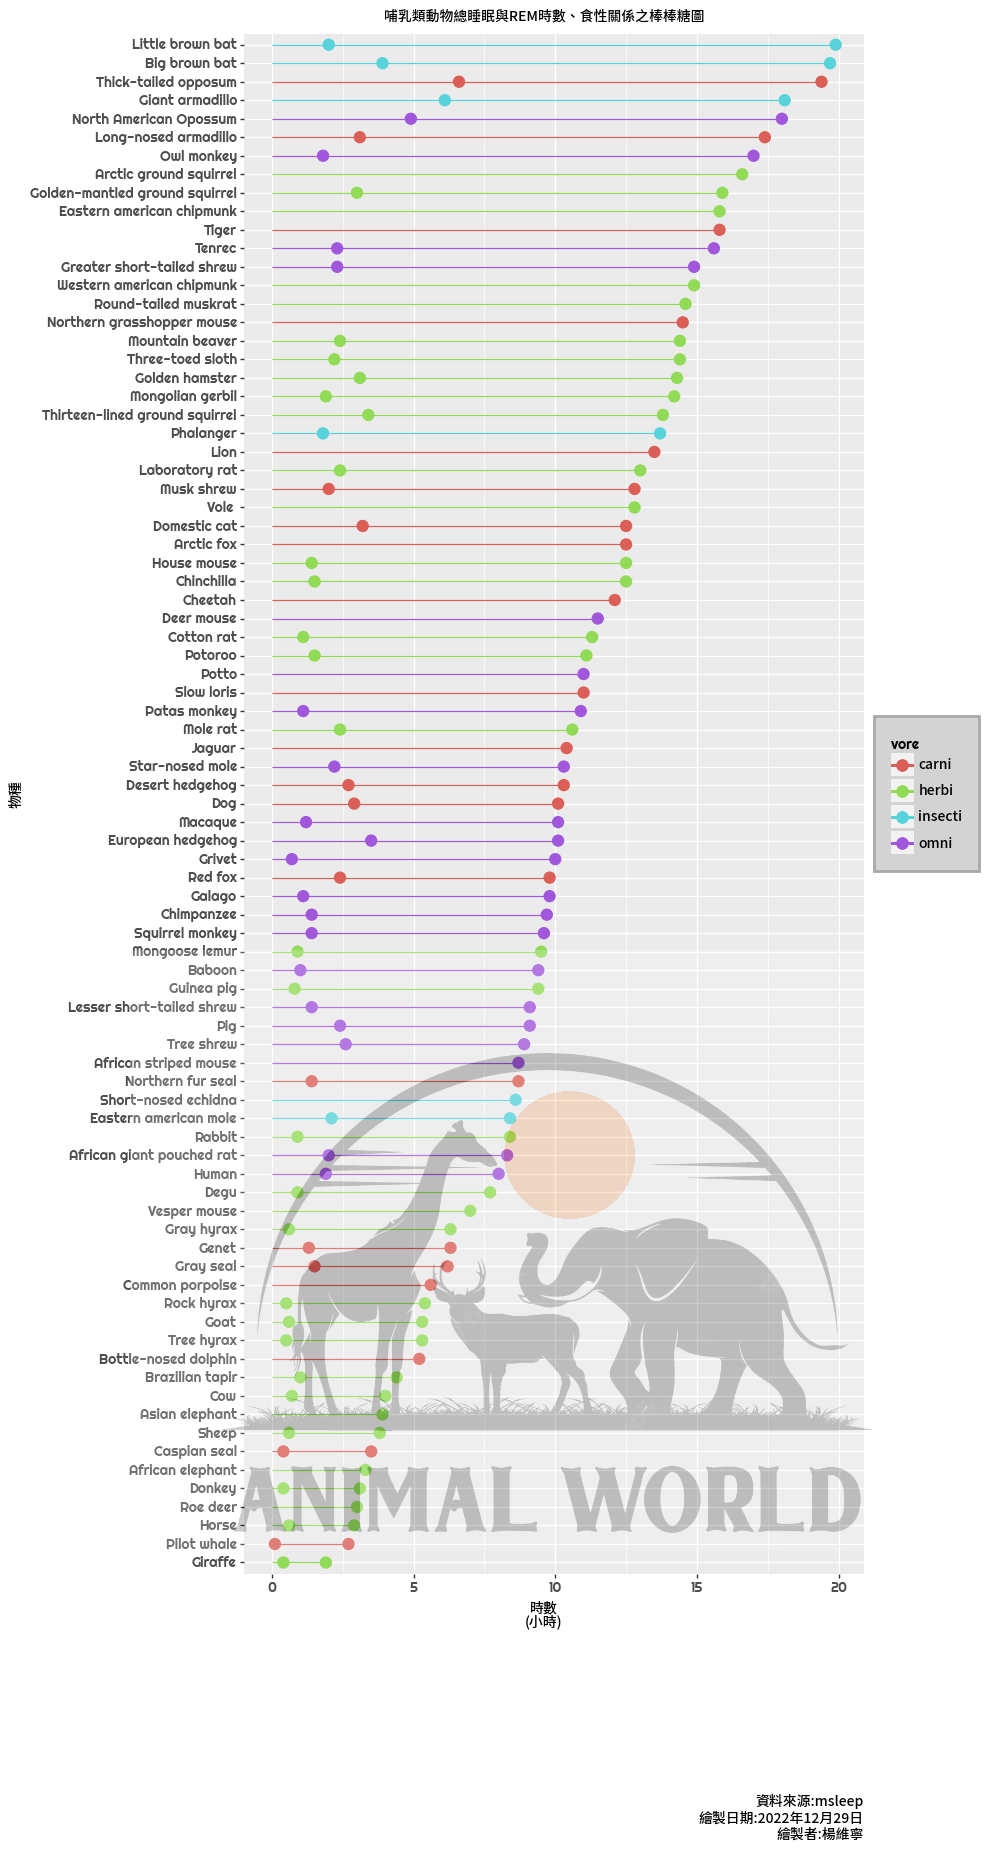

<ggplot: (142781951226)>

In [ ]:
ggplot(msleep, aes(x='sleep_total',y='reorder(name,sleep_total)',color='vore')) +\
  geom_segment(aes(x=0,xend='sleep_total',y='name',yend='name')) +\
  geom_point(shape='o',size=4) +\
  geom_point(aes(x='sleep_rem',y='name'),size=4) +\
  labs(title='哺乳類動物總睡眠與REM時數、食性關係之棒棒糖圖',x='時數\n(小時)',y='物種',
       caption='資料來源:msleep\n繪製日期:'+
       pd.Timestamp('today').strftime('%Y年%m月%d日') +
       '\n繪製者:楊維寧') +\
  theme(text=element_text(fontproperties=noto),
        axis_text_y=element_text(fontproperties=rig),
        axis_text_x=element_text(fontproperties=rig),
       plot_caption=element_text(fontproperties=noto),
        legend_title=element_text(fontproperties=rig),
        legend_background=element_rect(fill='lightgray',color='darkgray',size=2),
       figure_size=(8,20)) +\
  watermark('animal_world.PNG', xo=130, yo=300, alpha=0.2)

C:\Users\Mao-Joker\anaconda3\envs\pandaslesson\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 22 rows containing missing values.


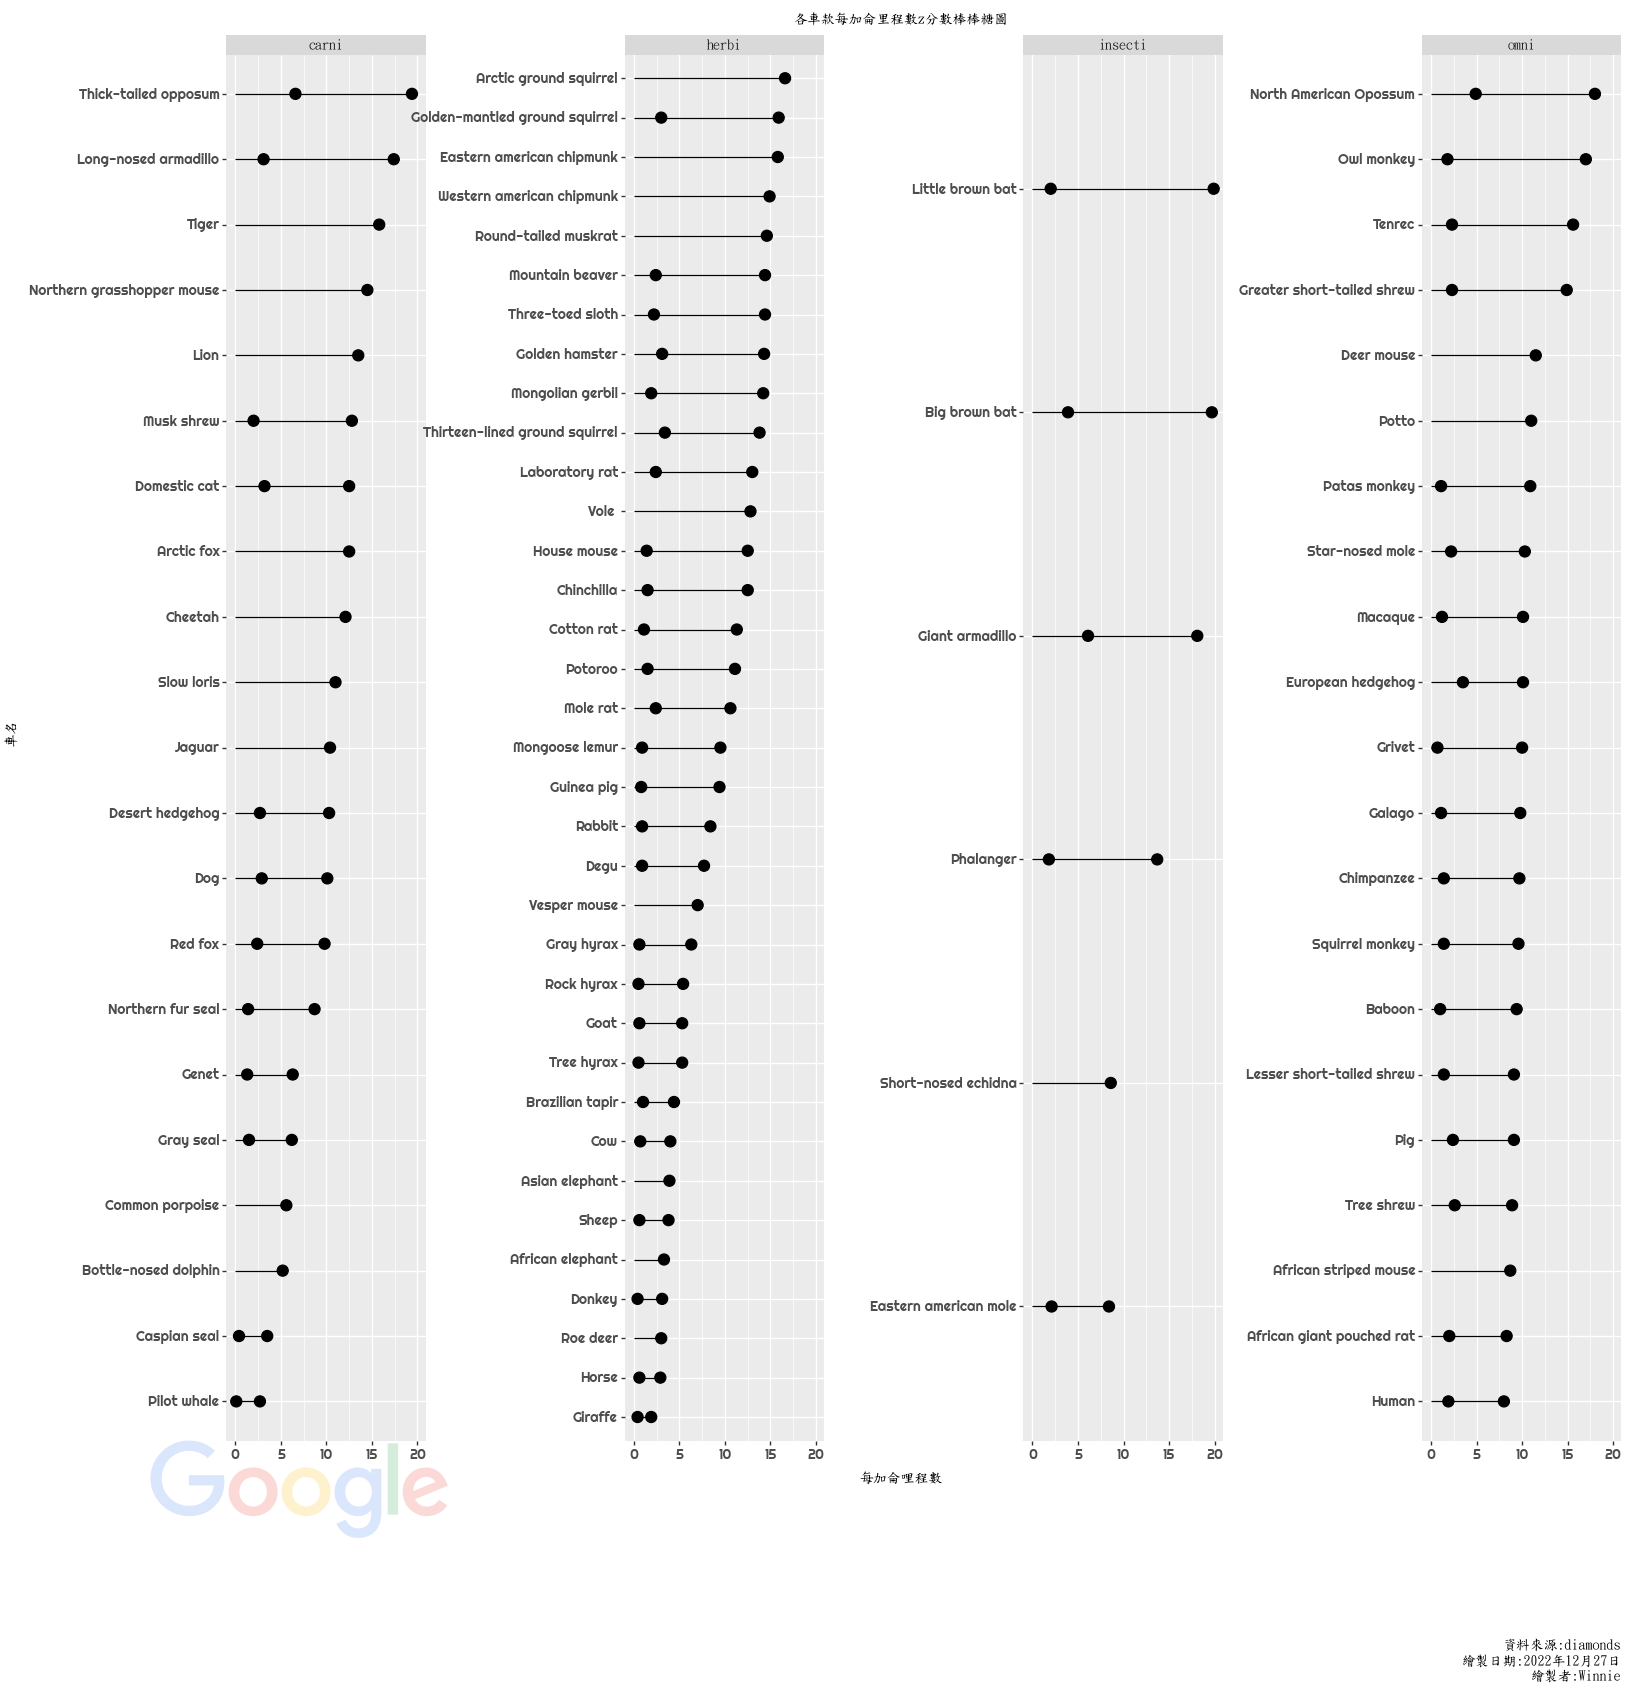

<ggplot: (75761286973)>

In [ ]:
ggplot(msleep, aes(x='sleep_total',y='reorder(name,sleep_total)')) +\
  geom_segment(aes(x=0,xend='sleep_total',y='name',yend='name')) +\
  geom_point(shape='o',size=4) +\
  geom_point(aes(x='sleep_rem',y='name'),size=4) +\
  facet_wrap('vore',nrow=1,scales='free_y')+\
  labs(title='各車款每加侖里程數z分數棒棒糖圖',x='每加侖哩程數',y='車名',
       caption='資料來源:diamonds\n繪製日期:'+pd.Timestamp('today').strftime('%Y年%m月%d日') + '\n繪製者:Winnie') +\
  theme(text=element_text(fontproperties=kai),
        axis_text_y=element_text(fontproperties=rig),
        axis_text_x=element_text(fontproperties=rig),
       plot_caption=element_text(fontproperties=kai),
       figure_size=(18,18),
       subplots_adjust={'wspace': 1}) +\
  watermark('Google_2015_logo.svg.png', xo=150, yo=150, alpha=0.2)

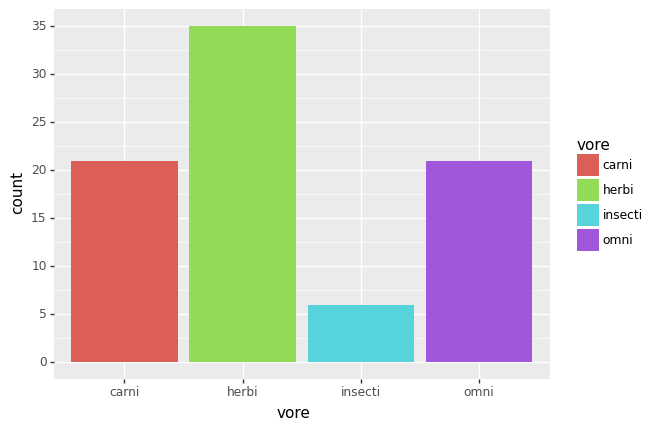

<ggplot: (75756082366)>

In [ ]:
ggplot(msleep,aes(x='vore',fill='vore')) +\
  geom_bar()+\
  scale_y_continuous(breaks=np.arange(0,40,5),limits=(0,35))+\
  labs(title='各食性動物總睡眠時間箱型圖',
      x='食性',
      y='總睡眠時間\n(小時)',
      caption='資料來源:msleep\n繪製日期:'+pd.Timestamp('today').strftime('%Y/%m/%d')+'\n繪製者:楊維寧') +\
  scale_y_continuous(breaks=np.arange(0,24,2),#刻度
                    limits=[0,24]) +\

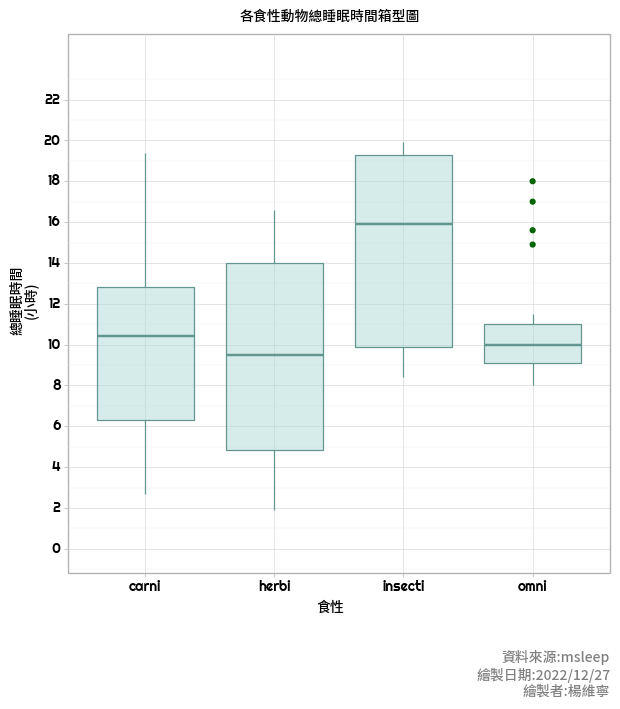

<ggplot: (75761196198)>

In [ ]:
ggplot(msleep, aes('vore', 'sleep_total')) +\
  geom_boxplot(color='#639691',fill='#afdbd7',alpha=0.5,
               outlier_shape='o',outlier_color='darkgreen')+\
  labs(title='各食性動物總睡眠時間箱型圖',
      x='食性',
      y='總睡眠時間\n(小時)',
      caption='資料來源:msleep\n繪製日期:'+pd.Timestamp('today').strftime('%Y/%m/%d')+'\n繪製者:楊維寧') +\
  scale_y_continuous(breaks=np.arange(0,24,2),#刻度
                    limits=[0,24]) +\
  theme_light() +\
  theme(figure_size=(7,7),
        text=element_text(fontproperties=noto),
        plot_caption=element_text(fontproperties=noto,color='gray'),
        axis_title=element_text(fontproperties=noto,color='black'),
        axis_text_x=element_text(fontproperties=rig,color='black'),
        axis_text_y=element_text(fontproperties=rig,color='black'))

# 第一張圖：高雄市五大刑事案件發生數堆疊長條圖(109~101年度)

## 資料集

In [ ]:
df3=pd.read_csv('https://data.kcg.gov.tw/dataset/12384a8a-a740-49e5-b606-e02baf1d6ed4/resource/13fb1707-5464-4927-811c-40e63e9bff4e/download/.csv')
df3

,年度,月份,案件別,發生數,破獲數,破獲率
0,109年,1月份,1全般刑案,"1,832","1,780",97.16%
1,109年,1月份,2暴力犯罪,4,6,150.00%
2,109年,1月份,3竊盜案件,305,299,98.03%
3,109年,1月份,4詐欺案件,167,179,107.19%
4,109年,1月份,5毒品案件,285,263,92.28%
...,...,...,...,...,...,...
170,111年,11月份,1全般刑案,"2,208","2,185",98.96%
171,111年,11月份,2暴力犯罪,1,3,300.00%
172,111年,11月份,3竊盜案件,305,306,100.33%
173,111年,11月份,4詐欺案件,273,270,98.90%


In [ ]:
df3.columns

Index(['年度', '月份', '案件別', '發生數', '破獲數', '破獲率'], dtype='object')

In [ ]:
df3.dtypes

年度     object
月份     object
案件別    object
發生數    object
破獲數    object
破獲率    object
dtype: object

## 資料整理

In [ ]:
df3[['發生數', '破獲數']].astype(int) #似乎是因為標點符號所以不能轉數字

ValueError: invalid literal for int() with base 10: '1,832'

In [ ]:
#因為資料中有','無法將object轉為int,故需去掉發生數與破獲數資料中的','
df3['發生數'] = df3['發生數'].str.replace('[,]','')

C:\Users\Mao-Joker\AppData\Local\Temp\ipykernel_9120\3568249728.py:2: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
df3['破獲數'] = df3['破獲數'].str.replace('[,]','')

C:\Users\Mao-Joker\AppData\Local\Temp\ipykernel_9120\2681469241.py:1: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
df3.head() #已成功去除

,年度,月份,案件別,發生數,破獲數,破獲率
0,109年,1月份,1全般刑案,1832,1780,97.16%
1,109年,1月份,2暴力犯罪,4,6,150.00%
2,109年,1月份,3竊盜案件,305,299,98.03%
3,109年,1月份,4詐欺案件,167,179,107.19%
4,109年,1月份,5毒品案件,285,263,92.28%


In [ ]:
#將兩列轉數字
df3.發生數 = df3.發生數.astype(int)
df3.發生數

0      1832
1         4
2       305
3       167
4       285
       ... 
170    2208
171       1
172     305
173     273
174     238
Name: 發生數, Length: 175, dtype: int32

In [ ]:
df3.破獲數 = df3.破獲數.astype(int) #轉數字
df3.破獲數

0      1780
1         6
2       299
3       179
4       263
       ... 
170    2185
171       3
172     306
173     270
174     230
Name: 破獲數, Length: 175, dtype: int32

In [ ]:
df3.dtypes #兩列已成功轉成數字

年度     object
月份     object
案件別    object
發生數     int32
破獲數     int32
破獲率    object
dtype: object

處理日期

In [ ]:
#將資料中的日期格式由object轉變為iint
df3.月份 = df3.月份.str.replace('[月份]','')
df3.月份.unique() 

C:\Users\Mao-Joker\AppData\Local\Temp\ipykernel_9120\332694351.py:1: FutureWarning: The default value of regex will change from True to False in a future version.


array([' 1', ' 2', ' 3', ' 4', ' 5', ' 6', ' 7', ' 8', ' 9', '10', '11',
       '12'], dtype=object)

In [ ]:
df3.月份 = df3.月份.astype(int)

In [ ]:
df3.年度 = df3.年度.str.replace('[年]','')
df3.年度.unique() 

C:\Users\Mao-Joker\AppData\Local\Temp\ipykernel_9120\1374539204.py:1: FutureWarning: The default value of regex will change from True to False in a future version.


array(['109', '110', '111'], dtype=object)

In [ ]:
df3.年度 = df3.年度.astype(int)

In [ ]:
#檢查用
df3.dtypes

年度      int32
月份      int32
案件別    object
發生數     int32
破獲數     int32
破獲率    object
dtype: object

將資料類別定義為catgeory

In [ ]:
df3.案件別 = df3.案件別.astype('category')

# 作圖

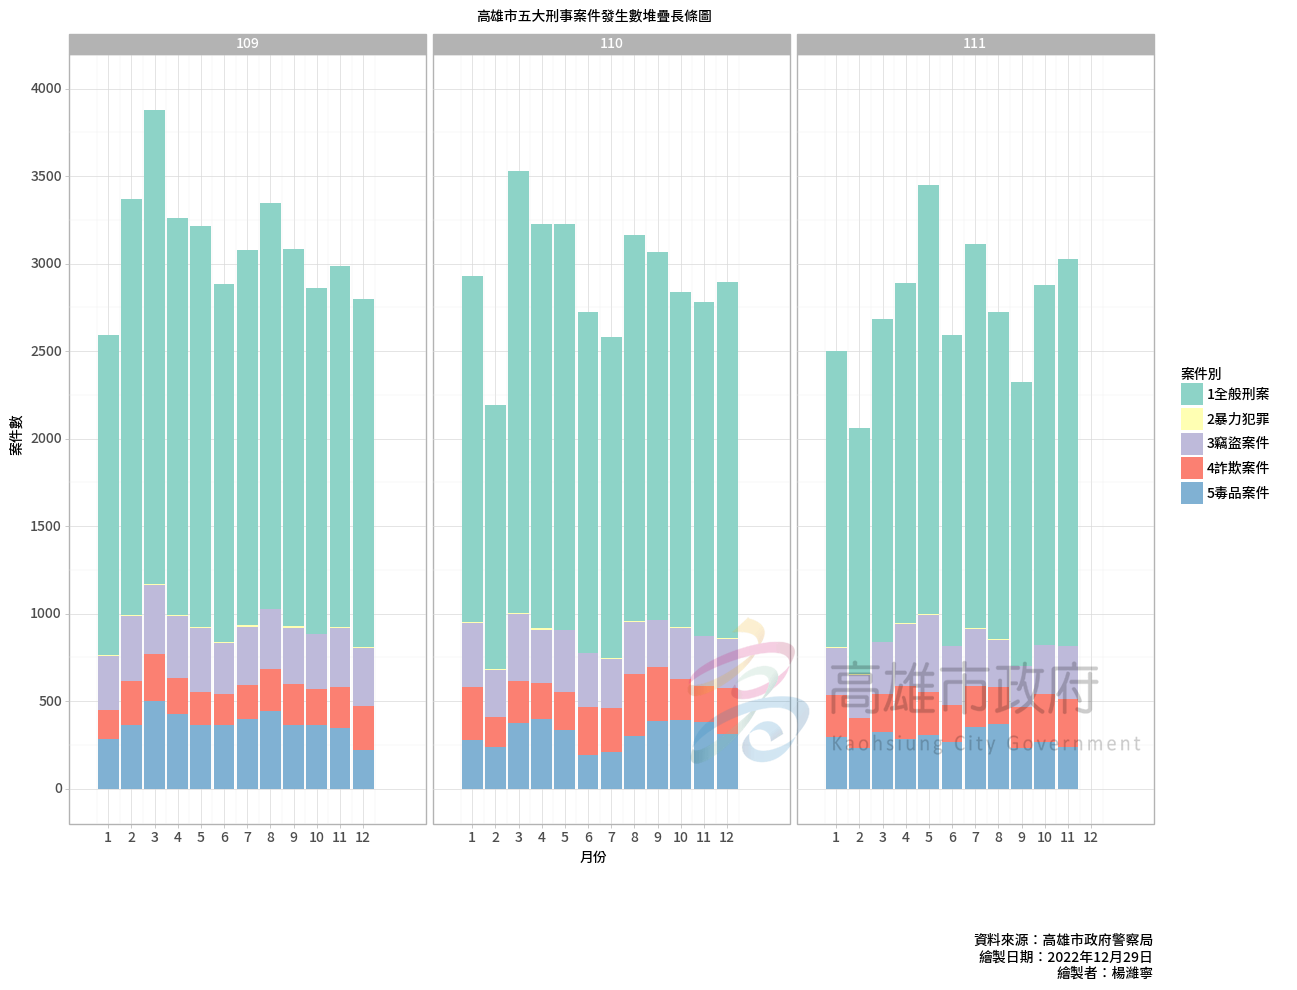

<ggplot: (142788094145)>

In [ ]:
ggplot(df3,aes(x='月份',y='發生數',fill='案件別')) +\
  geom_col(width=0.9)+\
  scale_x_continuous(breaks=np.arange(1,13,1),limits=(0,14))+\
  scale_y_continuous(breaks=np.arange(0,4500,500),limits=(0,4000))+\
  scale_colour_brewer(type='qual',palette='Set3',aesthetics=['fill'])+\
  labs(title='高雄市五大刑事案件發生數堆疊長條圖(109~101)',
      y='案件數',
      caption='資料來源：高雄市政府警察局\n繪製日期：'+pd.Timestamp('today').strftime('%Y年%m月%d日')+'\n繪製者：楊濰寧')+\
  theme_light()+\
  theme(figure_size=(14,10),
       text=element_text(fontproperties=noto),
       plot_caption=element_text(fontproperties=noto)) +\
  facet_wrap('年度') +\
  watermark('khgov.png', xo=670, yo=200, alpha=0.2)

# 結論
* 全般刑案：是指觸犯普通刑法與特別刑法的案件。殺人、強盜、擄人勒贖、性侵害等重大暴力案件，以及竊盜、詐欺、毒品、妨害風化、偽造文書等各類案件也屬之。
* 因對資料不了解的緣故作出了錯誤的圖
* 另有想將破獲率畫上，因此份統計資料最想呈現的就是破獲率，但還沒找到劃出破獲率的方法。百分比的資料整理方式也還需要學習。